# SCTP CAPSTONE 2:Healthcare Predictive Analytics

## Introduction to Project and Dataset

<!DOCTYPE html>
<html>
<head>
	<style>
		table {
			border:1px solid #b3adad;
			border-collapse:collapse;
			padding:5px;
		}
		table th {
			border:1px solid #b3adad;
			padding:5px;
			background: #f0f0f0;
			color: #313030;
		}
		table td {
			border:1px solid #b3adad;
			text-align:left;
			padding:5px;
			background: #ffffff;
			color: #313030;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
				<th>Description</th>
				<th>Content</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Name of Dataset:</td>
				<td>cardio_data</td>
			</tr>
			<tr>
				<td>Number of Rows:</td>
				<td>70,000 rows</td>
			</tr>
			<tr>
				<td>Number of Columns:</td>
				<td>&nbsp;16</td>
			</tr>
			<tr>
				<td>&nbsp;File Format</td>
				<td>&nbsp;.csv</td>
			</tr>
		</tbody>
	</table>
</body>
</html>

# 

### Brief Summary of Dataset:

Dataset contains medical information related to patients and whether they are diagnosed with cardiovascular disease or not.

### Project Task

To develop a machine learning model that can effectively predict the presence or absence of heart disease based on various medical and lifestyle factors through accurate classification of individuals as either having or not having heart disease.

## Data Cleaning in Power Query

#### ** Exact Screenshots of cleaning in power will be showcased in the Slide Deck

### 1. Columns in Dataset 

date, 
country,
id,
active,
age,
alco,
ap_hi,
ap_lo,
cholesterol,
gender,
gluc,
height,
occupation,
smoke,
weight,
disease


### 2. Using Column Profiling to check for Empty and Invalid Data

##### Observations: 
  - All columns contain no missing data
  - **Age** column has to be transformed into proper format:
     - The age values are in the format of number of days. To transform them, we divide the values by 365 and round off to the  nearest whole number:
  
    
    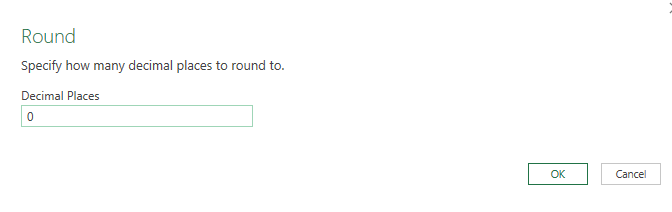
    

  - Output for Transformed Age Column:



- **ap_hi** and **ap_lo** also needs to be cleaned as some values are invalid (i.e. negative values, values there are outside the humanly possible range)

### 3. Further Cleaning and Transformation in Power Query

##### 3a) Based on assumptions that negative values have been wrongly entered where the negative sign was included, we proceed to change the negative values into positive values by removing negative signs


 - Steps:
   - 1. Filter for negative values in power query.
   - 2. Replace the negative values one by one, for example:
   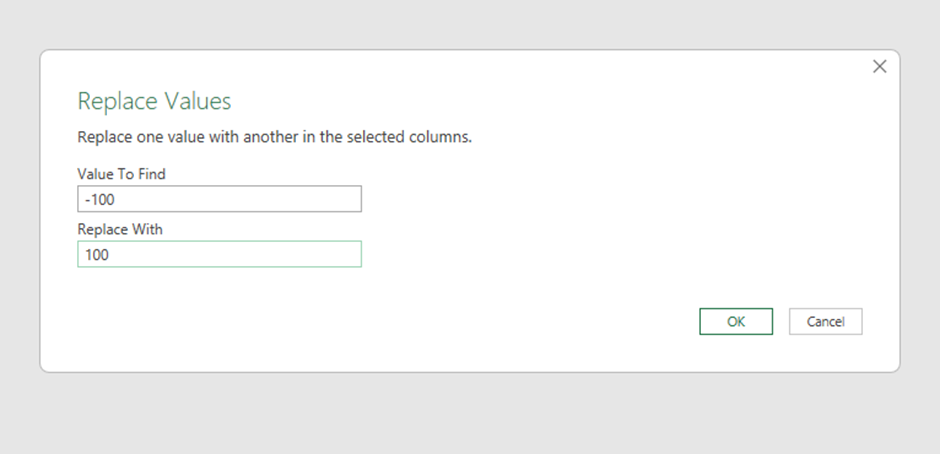

##### 3b) Checking and removing out of range values:

- Based on resources online, there are some guidelines to minimum and maximum systolic and dystolic blood pressure that is possible to be measured:
   - Systolic Blood Pressure : Between **50** and **300** mm Hg
   - Diastolic Blood Pressure : Between **30** and **200** mm Hg
   
###### References :

- American Heart Association (AHA) - Understanding Blood Pressure Readings: 
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings 
- National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) - Blood Sugar and Diabetes: https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/prediabetes-insulin-resistance 
- National Heart, Lung, and Blood Institute (NHLBI) - High Blood Cholesterol:
https://www.nhlbi.nih.gov/health-topics/high-blood-cholesterol 
- World Health Organization (WHO) - Diabetes: 
https://www.who.int/health-topics/diabetes


- Using Power Query Filter for rows that are within the stated range:
    
    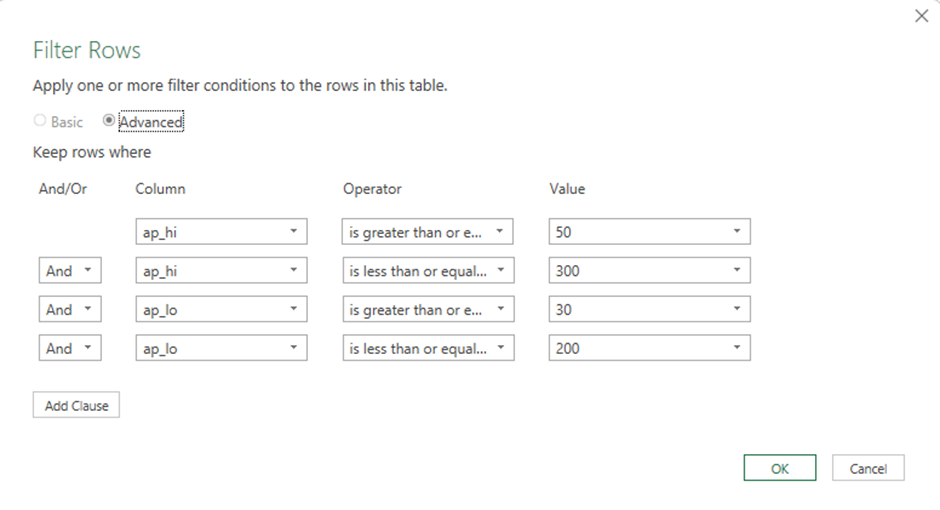


- After filtering 68788 rows were left. This removal consitnute only 1.7% of the dataset, and thus is justified and will not affect data consistency significantly

   - Before Removal : **70,000 rows** , After removal : **68788 rows**




- Have also added a Calculated Column that captures BMI of Patients using the height and weight.

#### ----------------- The dataset is ready to load the csv file into jupyter notebook for further transformation, analysis and modelling. -------------------

## Data Pre-processing in Python

## 1. Import required libraries for pre-processing and load csv file

In [38]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

In [39]:
cardio_data = pd.read_csv('cardio_data.csv')

In [40]:
# To display all columns when working with dataframe outputs

pd.set_option('display.max_columns', None)

In [41]:
cardio_data.columns

Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'BMI'],
      dtype='object')

In [42]:
cardio_data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68788 entries, 0 to 68787
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         68788 non-null  object 
 1   country      68788 non-null  object 
 2   id           68788 non-null  int64  
 3   active       68788 non-null  int64  
 4   age          68788 non-null  int64  
 5   alco         68788 non-null  int64  
 6   ap_hi        68788 non-null  int64  
 7   ap_lo        68788 non-null  int64  
 8   cholesterol  68788 non-null  int64  
 9   gender       68788 non-null  int64  
 10  gluc         68788 non-null  int64  
 11  height       68788 non-null  int64  
 12  occupation   68788 non-null  object 
 13  smoke        68788 non-null  int64  
 14  weight       68788 non-null  int64  
 15  disease      68788 non-null  int64  
 16  BMI          68788 non-null  float64
dtypes: float64(1), int64(13), object(3)
memory usage: 8.9+ MB


- As seen above from the info() output, country and occupation have to be transformed into a more suitable variable to be used for analysis. The method used will be one-hot encoding.

- Data type for the features will also have to changed accordingly to the data dictionary.

In [7]:
cardio_data.describe()

id        active           age          alco         ap_hi  \
count  68788.000000  68788.000000  68788.000000  68788.000000  68788.000000   
mean   49970.397904      0.803367     53.326699      0.053629    126.614686   
std    28844.626266      0.397455      6.767959      0.225285     16.763713   
min        0.000000      0.000000     30.000000      0.000000     60.000000   
25%    24996.750000      1.000000     48.000000      0.000000    120.000000   
50%    50009.500000      1.000000     54.000000      0.000000    120.000000   
75%    74859.250000      1.000000     58.000000      0.000000    140.000000   
max    99999.000000      1.000000     65.000000      1.000000    240.000000   

              ap_lo   cholesterol        gender          gluc        height  \
count  68788.000000  68788.000000  68788.000000  68788.000000  68788.000000   
mean      81.377275      1.364715      1.348753      1.225970    164.360252   
std        9.688121      0.678962      0.476579      0.571943      8.178248   
min       30.000000      1.000000      1.000000      1.000000     55.000000   
25%       80.000000      1.000000      1.000000      1.000000    159.000000   
50%       80.000000      1.000000      1.000000      1.000000    165.000000   
75%       90.000000      2.000000      2.000000      1.000000    170.000000   
max      190.000000      3.000000      2.000000      3.000000    207.000000   

              smoke        weight       disease           BMI  
count  68788.000000  68788.000000  68788.000000  68788.000000  
mean       0.087995     74.122056      0.494897     27.522993  
std        0.283290     14.331433      0.499978      6.050323  
min        0.000000     11.000000      0.000000      3.471784  
25%        0.000000     65.000000      0.000000     23.875115  
50%        0.000000     72.000000      0.000000     26.346494  
75%        0.000000     82.000000      1.000000     30.119376  
max        1.000000    200.000000      1.000000    298.666667

 - As seen above from the describe() output,there are differences in terms of scales of the features.For example, Min and Max values for BMI and weight differ relatively greatly as compared to gluc, cholesterol.
 
 - Therefore, some form of standardisation has to be applied to the data to ensure uniformity of scales and better model performance

In [8]:
skewAge = cardio_data.age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  -0.3050987916534928


In [9]:
skewHeight = cardio_data.height.skew(axis = 0, skipna = True)
print('Age skewness: ', skewHeight)

Age skewness:  -0.6260229501211155


In [10]:
skewWeight = cardio_data.weight.skew(axis = 0, skipna = True)
print('Age skewness: ', skewWeight)

Age skewness:  1.0076894670416225


In [11]:
skewChol = cardio_data.cholesterol.skew(axis = 0, skipna = True)
print('Age skewness: ', skewChol)

Age skewness:  1.5965018171574226


## 2. Feature Transformation

### Changing the datatypes for certain variables:

In [12]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68788 entries, 0 to 68787
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         68788 non-null  object 
 1   country      68788 non-null  object 
 2   id           68788 non-null  int64  
 3   active       68788 non-null  int64  
 4   age          68788 non-null  int64  
 5   alco         68788 non-null  int64  
 6   ap_hi        68788 non-null  int64  
 7   ap_lo        68788 non-null  int64  
 8   cholesterol  68788 non-null  int64  
 9   gender       68788 non-null  int64  
 10  gluc         68788 non-null  int64  
 11  height       68788 non-null  int64  
 12  occupation   68788 non-null  object 
 13  smoke        68788 non-null  int64  
 14  weight       68788 non-null  int64  
 15  disease      68788 non-null  int64  
 16  BMI          68788 non-null  float64
dtypes: float64(1), int64(13), object(3)
memory usage: 8.9+ MB


In [43]:
cardio_data_clean = cardio_data.filter(['id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'smoke',
       'weight', 'disease', 'BMI',])

In [44]:
cardio_data['active'] = cardio_data['active'].astype('bool')
cardio_data['alco'] = cardio_data['alco'].astype('bool')
cardio_data['smoke'] = cardio_data['smoke'].astype('bool')
cardio_data['disease'] = cardio_data['disease'].astype('bool')

In [45]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68788 entries, 0 to 68787
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         68788 non-null  object 
 1   country      68788 non-null  object 
 2   id           68788 non-null  int64  
 3   active       68788 non-null  bool   
 4   age          68788 non-null  int64  
 5   alco         68788 non-null  bool   
 6   ap_hi        68788 non-null  int64  
 7   ap_lo        68788 non-null  int64  
 8   cholesterol  68788 non-null  int64  
 9   gender       68788 non-null  int64  
 10  gluc         68788 non-null  int64  
 11  height       68788 non-null  int64  
 12  occupation   68788 non-null  object 
 13  smoke        68788 non-null  bool   
 14  weight       68788 non-null  int64  
 15  disease      68788 non-null  bool   
 16  BMI          68788 non-null  float64
dtypes: bool(4), float64(1), int64(9), object(3)
memory usage: 7.1+ MB


###  One-Hot Encoding for Categorical variables

 **Country Variable**:

In [46]:
# Get dummies
country_dummies = pd.get_dummies(cardio_data['country'])
print('done')

# Concatenate dummies with original DataFrame
cardio_data = pd.concat([cardio_data, country_dummies], axis=1)
cardio_data = cardio_data.drop('country', axis =1)

print(cardio_data.columns)

done
Index(['date', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol',
       'gender', 'gluc', 'height', 'occupation', 'smoke', 'weight', 'disease',
       'BMI', 'India', 'Indonesia', 'Malaysia', 'Singapore'],
      dtype='object')


In [47]:
occupation_dummies = pd.get_dummies(cardio_data['occupation'])
print('done')

# Concatenate dummies with original DataFrame
cardio_data = pd.concat([cardio_data, occupation_dummies], axis=1)
cardio_data = cardio_data.drop('occupation', axis =1)

print(cardio_data.columns)

done
Index(['date', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol',
       'gender', 'gluc', 'height', 'smoke', 'weight', 'disease', 'BMI',
       'India', 'Indonesia', 'Malaysia', 'Singapore', 'Accountant',
       'Architect', 'Chef', 'Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Others',
       'Teacher'],
      dtype='object')


In [48]:
gender_dummies = pd.get_dummies(cardio_data['gender'])
print('done')

# Concatenate dummies with original DataFrame
cardio_data = pd.concat([cardio_data, gender_dummies], axis=1)
cardio_data = cardio_data.drop('gender', axis =1)

print(cardio_data.columns)

done
Index([       'date',          'id',      'active',         'age',
              'alco',       'ap_hi',       'ap_lo', 'cholesterol',
              'gluc',      'height',       'smoke',      'weight',
           'disease',         'BMI',       'India',   'Indonesia',
          'Malaysia',   'Singapore',  'Accountant',   'Architect',
              'Chef',      'Doctor',    'Engineer',      'Lawyer',
             'Nurse',      'Others',     'Teacher',             1,
                   2],
      dtype='object')


In [49]:
cardio_data.rename(columns={1:'male',2:'female'}, inplace=True)
print(cardio_data.columns)

Index(['date', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'height', 'smoke', 'weight', 'disease', 'BMI', 'India',
       'Indonesia', 'Malaysia', 'Singapore', 'Accountant', 'Architect', 'Chef',
       'Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Others', 'Teacher', 'male',
       'female'],
      dtype='object')


###  Creating a calculated column for blood pressure

In [50]:
# Create a Mean Blood Pressure column for a more parsimonious measure of BP

cardio_data['mean_bp'] = cardio_data['ap_lo'] + ((1/3)*(cardio_data['ap_hi']-cardio_data['ap_lo']))

In [51]:
print(cardio_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68788 entries, 0 to 68787
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         68788 non-null  object 
 1   id           68788 non-null  int64  
 2   active       68788 non-null  bool   
 3   age          68788 non-null  int64  
 4   alco         68788 non-null  bool   
 5   ap_hi        68788 non-null  int64  
 6   ap_lo        68788 non-null  int64  
 7   cholesterol  68788 non-null  int64  
 8   gluc         68788 non-null  int64  
 9   height       68788 non-null  int64  
 10  smoke        68788 non-null  bool   
 11  weight       68788 non-null  int64  
 12  disease      68788 non-null  bool   
 13  BMI          68788 non-null  float64
 14  India        68788 non-null  bool   
 15  Indonesia    68788 non-null  bool   
 16  Malaysia     68788 non-null  bool   
 17  Singapore    68788 non-null  bool   
 18  Accountant   68788 non-null  bool   
 19  Arch

### Scaling of Variables using Standardisation

**Reasons for Standardization**

    - Essential to stadardize the scales of features for machine learning algortihms employing gradient calculations such as logistic regression and artificial neural networks, improving performance and interpretability.
    - Makes the models more robust to the dataset's outliers and anomalies

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = cardio_data.drop(['disease','date','id'], axis = 1)

cardio_data_stan = scaler.fit_transform(X)
cardio_data_stan = pd.DataFrame(cardio_data_stan, columns= X.columns)

In [53]:
# Add the target variable into the dataframe

cardio_data_stan['disease']=cardio_data['disease']

In [54]:
cardio_data_stan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68788 entries, 0 to 68787
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   active       68788 non-null  float64
 1   age          68788 non-null  float64
 2   alco         68788 non-null  float64
 3   ap_hi        68788 non-null  float64
 4   ap_lo        68788 non-null  float64
 5   cholesterol  68788 non-null  float64
 6   gluc         68788 non-null  float64
 7   height       68788 non-null  float64
 8   smoke        68788 non-null  float64
 9   weight       68788 non-null  float64
 10  BMI          68788 non-null  float64
 11  India        68788 non-null  float64
 12  Indonesia    68788 non-null  float64
 13  Malaysia     68788 non-null  float64
 14  Singapore    68788 non-null  float64
 15  Accountant   68788 non-null  float64
 16  Architect    68788 non-null  float64
 17  Chef         68788 non-null  float64
 18  Doctor       68788 non-null  float64
 19  Engi

## 3. Feature Selection

- **Feature selection in this case study will be based on the Filter Method**

### Step 1 : Find independent variables that are significantly correlated with the target variable.

In [55]:
from scipy.stats import pearsonr

corr_matrix = cardio_data_stan.corr(numeric_only = True)

p_values= pd.DataFrame(index=corr_matrix.index, columns=corr_matrix.columns)

for col1 in corr_matrix.columns:
    for col2 in corr_matrix.index:
        if col1 != col2:
            corr_coef, p_value = pearsonr(cardio_data_stan[col1], cardio_data_stan[col2])
            if abs(p_value) < 0.05:  # Check if absolute value of p-value is less than 0.05 for 95% confidence interval
                p_values.at[(col1, col2)] = 'P < 0.05'
            else:
                p_values.at[(col1, col2)] = p_value

# Filter coefficients with absolute value greater than 0.1
significant_corr = corr_matrix['disease'].abs() > 0.01

print("Correlation Matrix:")

# Retrieve on correlations coefficient associated with disease, the target variable
print(corr_matrix['disease'][significant_corr].round(3))
print("P-Values DataFrame (Significant p-values only):")
print(p_values['disease'])

Correlation Matrix:
active        -0.037
age            0.239
ap_hi          0.425
ap_lo          0.335
cholesterol    0.221
gluc           0.090
height        -0.011
smoke         -0.016
weight         0.180
BMI            0.164
mean_bp        0.409
disease        1.000
Name: disease, dtype: float64
P-Values DataFrame (Significant p-values only):
active         P < 0.05
age            P < 0.05
alco           P < 0.05
ap_hi          P < 0.05
ap_lo          P < 0.05
cholesterol    P < 0.05
gluc           P < 0.05
height         P < 0.05
smoke          P < 0.05
weight         P < 0.05
BMI            P < 0.05
India          0.695653
Indonesia      0.681842
Malaysia        0.96311
Singapore      0.452351
Accountant     0.063153
Architect      0.854593
Chef           0.358016
Doctor         0.707737
Engineer       0.164102
Lawyer         0.727924
Nurse          0.813539
Others         0.938085
Teacher        0.420476
male           0.058122
female         0.058122
mean_bp        P < 0.05
di

**Observations**
   - The variables that are significantly correlated with disease based on a confidence interval of **95%**  are : active, age, alco,ap_hi, ap_lo, cholesterol, gluc, height, smoke, weight,BMI and mean_bp.
        
   - ap_hi, ap_lo, height and weight will subsequently be dropped as features as BMI and mean_bp variables have already been derived from them.


age   mean_bp  cholesterol       BMI     smoke    active  \
age          1.000000  0.193706     0.155319  0.086719 -0.048076 -0.010317   
mean_bp      0.193706  1.000000     0.189858  0.236507  0.028048 -0.000516   
cholesterol  0.155319  0.189858     1.000000  0.146470  0.009854  0.009004   
BMI          0.086719  0.236507     0.146470  1.000000 -0.027985 -0.014239   
smoke       -0.048076  0.028048     0.009854 -0.027985  1.000000  0.025464   
active      -0.010317 -0.000516     0.009004 -0.014239  0.025464  1.000000   
gluc         0.098964  0.091019     0.451255  0.101815 -0.005724 -0.007453   
alco        -0.029197  0.041719     0.035695  0.015060  0.339948  0.025065   
disease      0.239063  0.408680     0.221492  0.164371 -0.016280 -0.037238   

                 gluc      alco   disease  
age          0.098964 -0.029197  0.239063  
mean_bp      0.091019  0.041719  0.408680  
cholesterol  0.451255  0.035695  0.221492  
BMI          0.101815  0.015060  0.164371  
smoke       -0.005724  0.339948 -0.016280  
active      -0.007453  0.025065 -0.037238  
gluc         1.000000  0.011215  0.090101  
alco         0.011215  1.000000 -0.008218  
disease      0.090101 -0.008218  1.000000

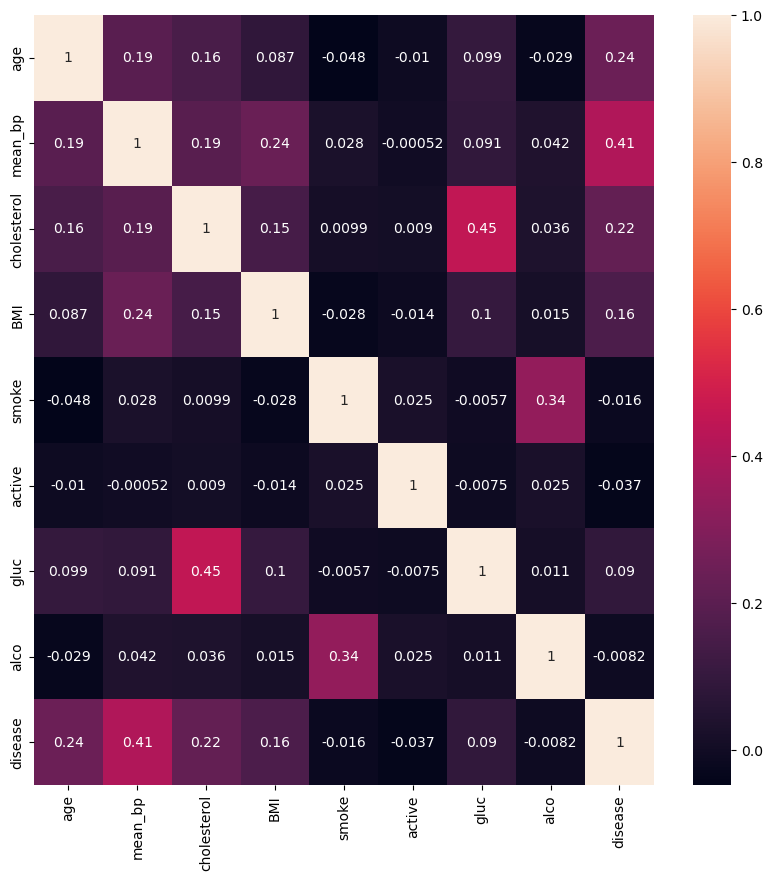

In [56]:
cdscorr = cardio_data_stan.filter(['age','mean_bp','cholesterol','BMI','smoke','active','gluc','alco','disease',],axis=1).corr(numeric_only = True)

display(cdscorr)
#display(cardio_data.corr(numeric_only = True))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cdscorr, annot=True)
plt.show()

### Final Correlational Data Observations:


   - gluc (glucose level) is moderately correlated with cholesterol. Decision is made to drop gluc as cholesterol's correlation coefficient is higher than gluc.
   - alco although was significantly correlated with disease, it's correlation coefficient was less than 0.01 in absolute value and thus will also be dropped in the feature selection
   

In [57]:
##  EDA based on selected features using original dataframe 'cardio_data'

### Distribution of Cardiovascular Disease Based on Gender

<Figure size 1200x600 with 0 Axes>

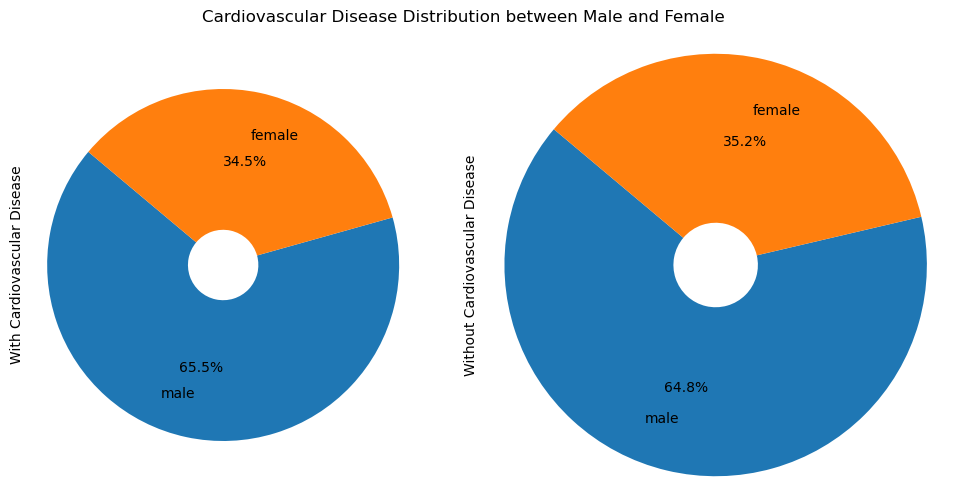

In [58]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by gender and disease, then count occurrences
grouped = cardio_data.groupby('disease')[['male','female']].sum()

# Replace disease labels
grouped.index = ['With Cardiovascular Disease', 'Without Cardiovascular Disease']

# Plotting the pie chart
plt.figure(figsize=(12, 6))  # Larger figure size
grouped.T.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=140, legend=False, layout=(1, 2), figsize=(10, 5), 
                wedgeprops=dict(width=0.8), labeldistance=0.75)  # Adjust the width of the wedges and label distance
plt.suptitle('Cardiovascular Disease Distribution between Male and Female')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<Figure size 1000x600 with 0 Axes>

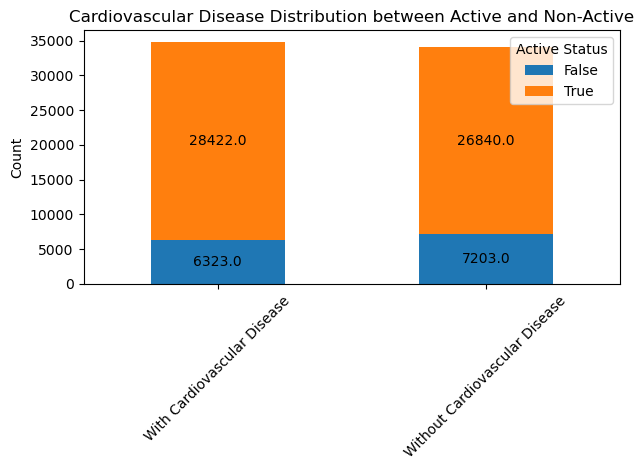

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


# Replace disease labels
grouped = cardio_data.groupby(['disease', 'active']).size().unstack(fill_value=0)
grouped.index = ['With Cardiovascular Disease', 'Without Cardiovascular Disease']



# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = grouped.plot(kind='bar', stacked=True)
plt.title('Cardiovascular Disease Distribution between Active and Non-Active')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Include labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height}', ha='center', va='center')

# Adjust legend position
plt.legend(title='Active Status', loc='upper right')

plt.tight_layout()
plt.show()

Age skewness:  7.789836757609316


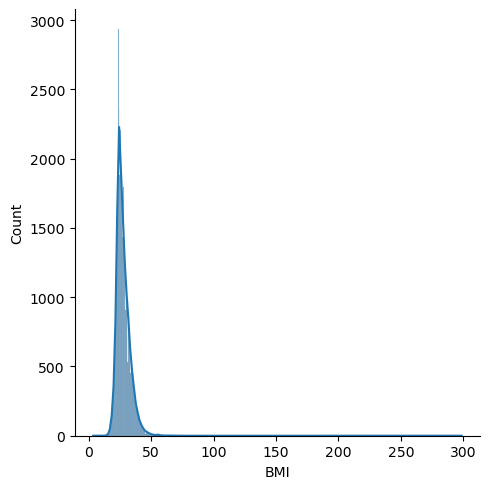

In [60]:
skewBMI_stan = cardio_data.BMI.skew(axis = 0, skipna = True)
sns.displot(cardio_data['BMI'], kde = True);
print('Age skewness: ', skewBMI_stan)

Age skewness:  -0.3050987916534928


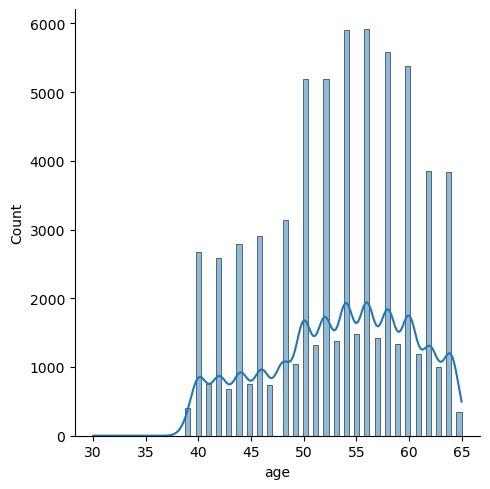

In [61]:
skewage_stan = cardio_data.age.skew(axis = 0, skipna = True)
sns.displot(cardio_data['age'], kde = True);
print('Age skewness: ', skewage_stan)

Age skewness:  0.6410168826011582


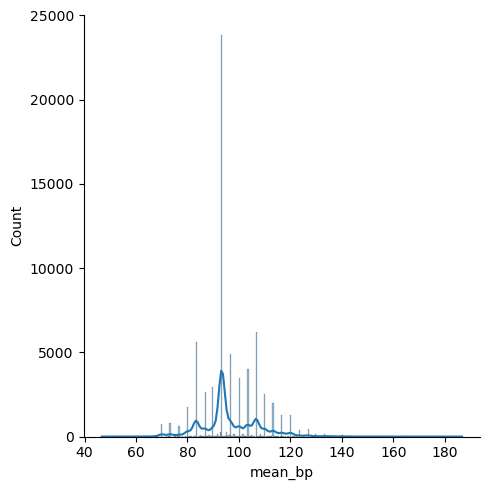

In [62]:
skewmeanbp_stan = cardio_data.mean_bp.skew(axis = 0, skipna = True)
sns.displot(cardio_data['mean_bp'], kde = True);
print('Age skewness: ', skewmeanbp_stan)

## Modelling data using Machine Learning and Deep Learning Algorithms

## Logistic Regression

In [63]:
### Splitting the data in to test and train sets

X1 =  cardio_data_stan.filter(['age','mean_bp','cholesterol','BMI','smoke','active'],axis=1)
Y1 =  cardio_data_stan['disease'] 

In [64]:
from sklearn.model_selection import train_test_split 

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.3, random_state=0, stratify=Y1)

              precision    recall  f1-score   support

       False       0.71      0.78      0.74     10424
        True       0.75      0.67      0.71     10213

    accuracy                           0.73     20637
   macro avg       0.73      0.73      0.73     20637
weighted avg       0.73      0.73      0.73     20637

The accuracy of logistic regression is: 72.64137229248438 %
0.15555708057107995


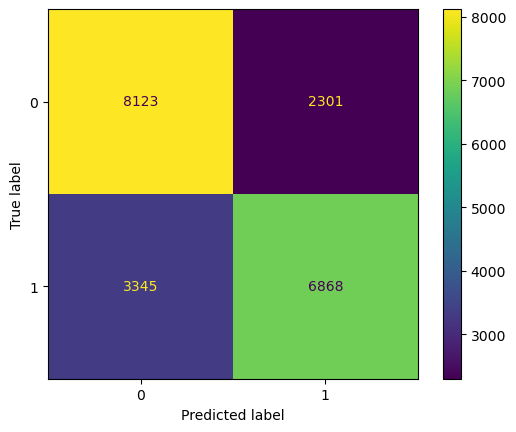

In [65]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

log = LogisticRegression(max_iter=5000)

log.fit(X1_train,Y1_train)

logPrediction = log.predict(X1_test)

logAccuracy = metrics.accuracy_score(logPrediction,Y1_test)

y_pred = log.predict(X1_test)

print(classification_report(Y1_test, y_pred))


print("The accuracy of logistic regression is:", logAccuracy*100, "%")
LogVariance = metrics.v_measure_score(logPrediction,Y1_test)
print(LogVariance)

logConf = metrics.confusion_matrix(Y1_test, logPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=logConf)
disp.plot()
plt.show()

C:\Users\65820\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1407: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


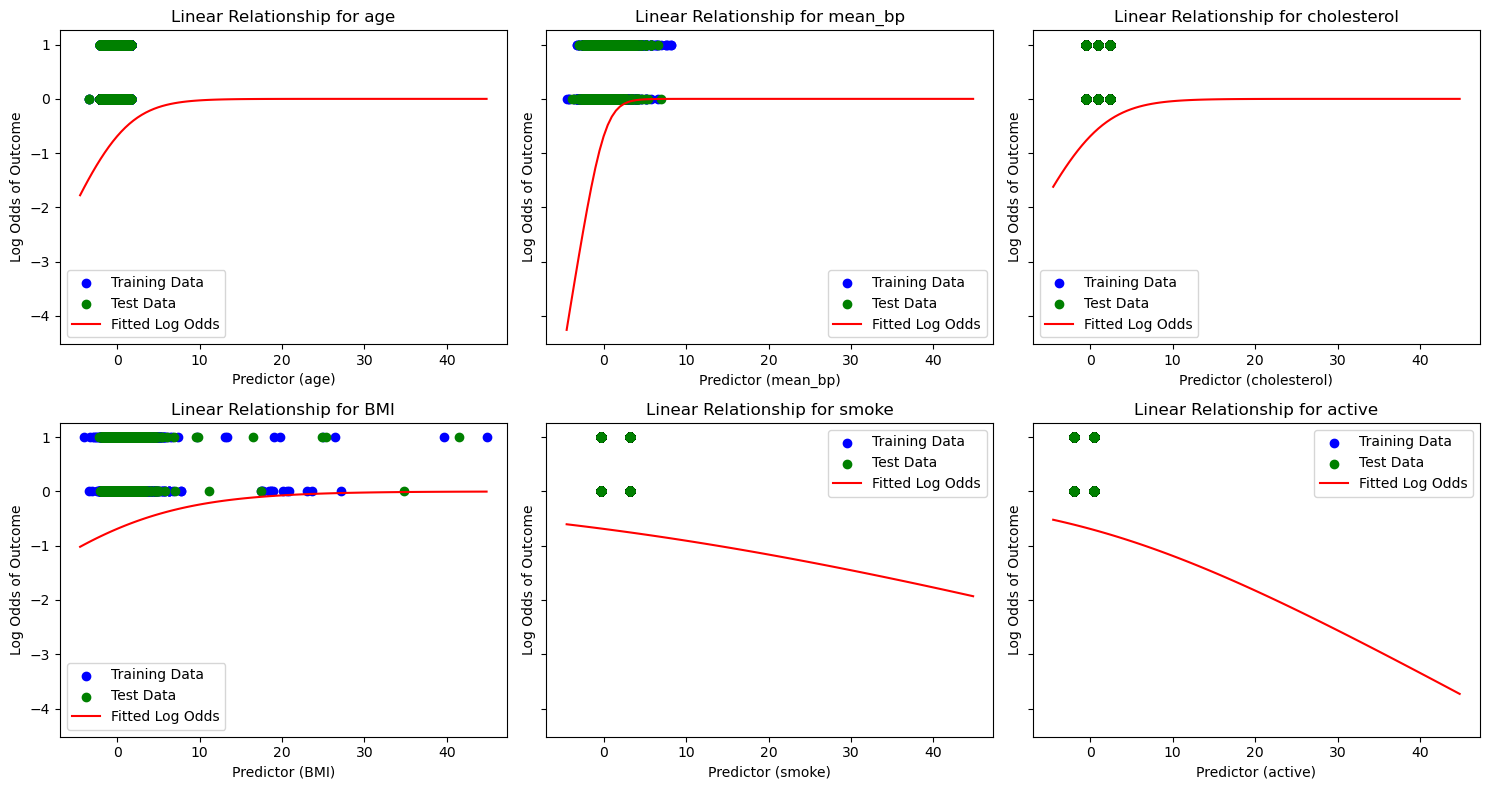

In [68]:
# Fit logistic regression model on the training data
model = LogisticRegression()
model.fit(X1_train, Y1_train)

# Create a fine grid of values for each predictor variable
X_plot = np.linspace(X1.min().min(), X1.max().max(), 100)

# Initialize a DataFrame to store the predicted log odds for each combination of predictor values
log_odds_df = pd.DataFrame()

# Iterate over each predictor variable
for col in X1.columns:
    # Create a DataFrame with all other predictors set to their mean values
    X_plot_df = pd.DataFrame({c: X1[c].mean() for c in X1.columns}, index=range(100))
    X_plot_df[col] = X_plot
    
    # Compute predicted log odds for each value of the current predictor variable
    log_odds = model.predict_log_proba(X_plot_df)[:, 1]
    log_odds_df[col] = log_odds

# Plot the log odds for each predictor variable
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.ravel()

for i, col in enumerate(X1.columns):
    ax = axes[i]
    ax.scatter(X1_train[col], Y1_train, color='blue', label='Training Data')
    ax.scatter(X1_test[col], Y1_test, color='green', label='Test Data')
    ax.plot(X_plot, log_odds_df[col], color='red', label='Fitted Log Odds')
    ax.set_xlabel(f'Predictor ({col})')
    ax.set_ylabel('Log Odds of Outcome')
    ax.set_title(f'Linear Relationship for {col}')
    ax.legend()

plt.tight_layout()
plt.show()

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Create a LR Classifier instance with your desired parameters
log = LogisticRegression(max_iter=5000)

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
cv_scores1a = cross_val_score(log, X1_train, Y1_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores1a)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores1a.mean())
print("Standard deviation of CV scores:", cv_scores1a.std())

Cross-validation scores: [0.72072259 0.7165109  0.71941848 0.72357217 0.71983385 0.72544133
 0.72274143 0.71775701 0.71443406 0.72377985]
Mean CV score: 0.7204211687935335
Standard deviation of CV scores: 0.003338709033137547


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Create a LR Classifier instance with your desired parameters
log = LogisticRegression(max_iter=5000)

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
cv_scores1b = cross_val_score(log, X1_train, Y1_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores1b)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores1b.mean())
print("Standard deviation of CV scores:", cv_scores1b.std())

Cross-validation scores: [0.71809781 0.7211838  0.72284528 0.72035306 0.71952233]
Mean CV score: 0.7204004548741609
Standard deviation of CV scores: 0.001591622465083248


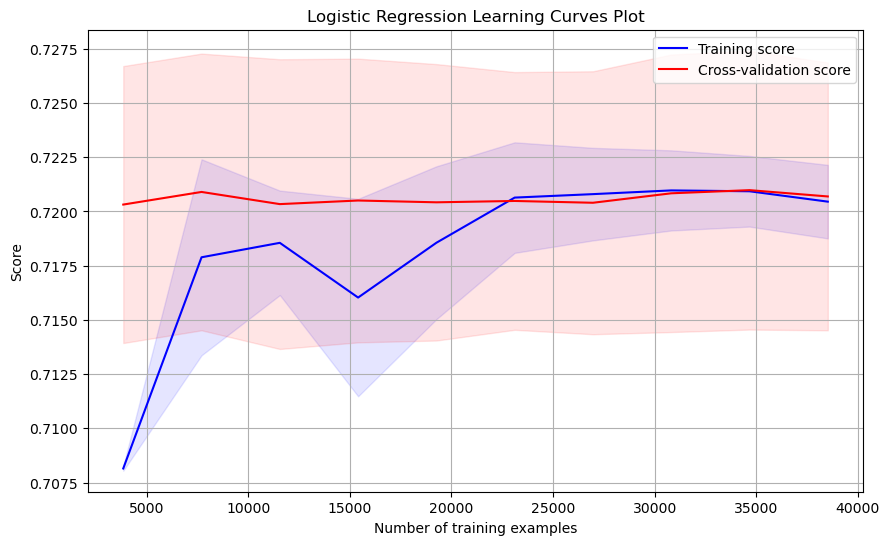

In [113]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a RandomForestClassifier instance with your desired parameters
lr_classifier = LogisticRegression(max_iter=5000)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(lr_classifier, X1_train, Y1_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Logistic Regression Learning Curves Plot')
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## RANDOM FOREST

In [32]:
X2 =  cardio_data_stan.filter(['age','mean_bp','cholesterol','BMI','smoke','active'],axis=1)
Y2 =  cardio_data_stan['disease'] 

In [33]:
from sklearn.model_selection import train_test_split 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.3, random_state=0, stratify=Y2)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

RFclassifier = RandomForestClassifier(max_leaf_nodes = 30, n_estimators = 50, max_depth = 5, random_state = 7)
RFclassifier.fit(X2_train, Y2_train)

y2_pred = RFclassifier.predict(X2_test)

print(classification_report(Y2_test, y2_pred))


from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y2_pred,Y2_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))


disp = ConfusionMatrixDisplay(confusion_matrix(Y2_test, y2_pred))
disp.plot()
plt.show()

              precision    recall  f1-score   support

       False       0.70      0.78      0.74     10424
        True       0.75      0.66      0.70     10213

    accuracy                           0.72     20637
   macro avg       0.73      0.72      0.72     20637
weighted avg       0.73      0.72      0.72     20637

Random Forest accuracy is: 72.38%


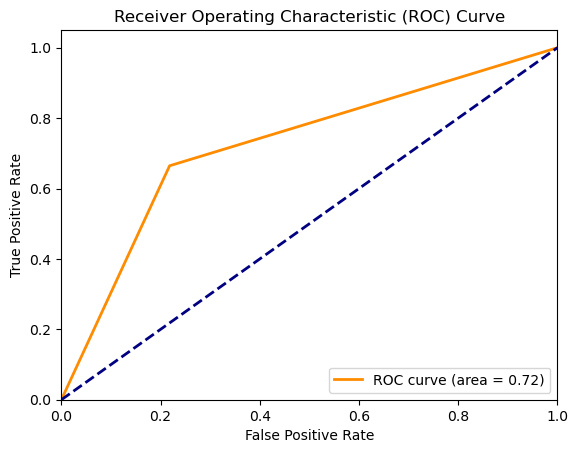

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true are the true labels and y_score are the predicted scores or probabilities
fpr, tpr, thresholds = roc_curve(Y2_test, y2_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with your desired parameters
rf_classifier = RandomForestClassifier(max_leaf_nodes = 30, n_estimators = 50, max_depth = 5, random_state = 7)

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
cv_scores2a = cross_val_score(rf_classifier, X2_train, Y2_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores2a)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores2a.mean())
print("Standard deviation of CV scores:", cv_scores2a.std())

Cross-validation scores: [0.72300664 0.72274143 0.71775701 0.72170301 0.72377985 0.72668744
 0.72647975 0.71838006 0.72066459 0.72502596]
Mean CV score: 0.7226225751475697
Standard deviation of CV scores: 0.0029159909745032774


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with your desired parameters
rf_classifier = RandomForestClassifier(max_leaf_nodes = 30, n_estimators = 50, max_depth = 5, random_state = 7)

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
cv_scores2b = cross_val_score(rf_classifier, X2_train, Y2_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores2b)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores2b.mean())
print("Standard deviation of CV scores:", cv_scores2b.std())

Cross-validation scores: [0.72380853 0.71983385 0.72398754 0.72170301 0.72222222]
Mean CV score: 0.7223110320138123
Standard deviation of CV scores: 0.0015209986739880645


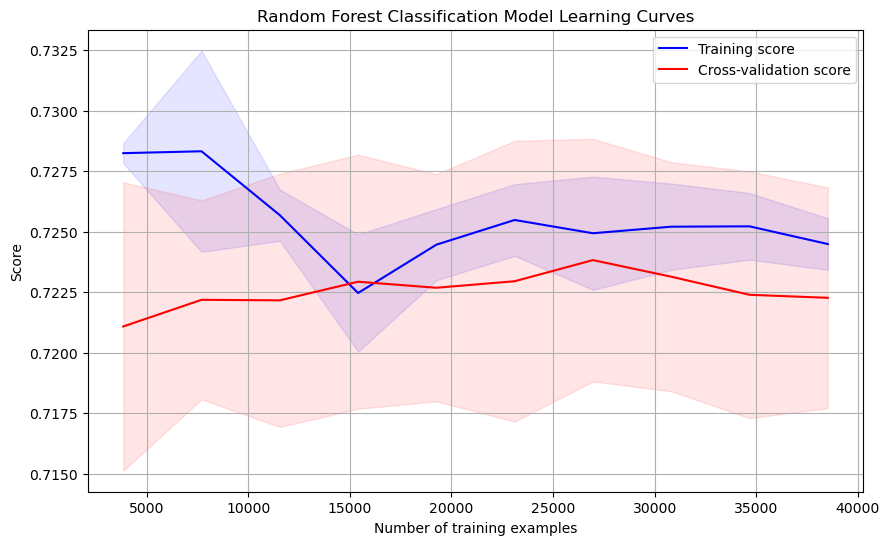

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a RandomForestClassifier instance with your desired parameters
rf_classifier = RandomForestClassifier(max_leaf_nodes = 30, n_estimators = 50, max_depth = 5, random_state = 7)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X2_train, Y2_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Random Forest Classification Model Learning Curves')
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Multi-Layer Perceptron (MLP)

In [40]:
X3 =  cardio_data_stan.filter(['age','mean_bp','cholesterol','BMI','smoke','active'],axis=1)
Y3 =  cardio_data_stan['disease'] 

In [41]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3,test_size=0.3, random_state=0, stratify=Y3)

Epoch 1/30


C:\Users\65820\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.6616 - loss: 0.6251
Epoch 2/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.7185 - loss: 0.5653
Epoch 3/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.7244 - loss: 0.5579
Epoch 4/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - accuracy: 0.7221 - loss: 0.5629
Epoch 5/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.7222 - loss: 0.5628
Epoch 6/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.7200 - loss: 0.5613
Epoch 7/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.7233 - loss: 0.5598
Epoch 8/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.7214 - loss: 0.5615
Epoch 9/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.7268 - loss: 0.5575
Epoch 10/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.7205 - loss: 0.5639
Epoch 11/30
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.7185 - loss: 0.5637
Epoch 12/30
1505/15

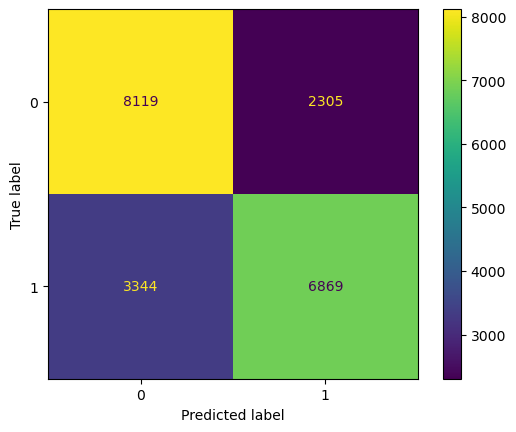

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=6))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X3_train, Y3_train, batch_size = 32, epochs = 30)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y3_pred = classifier.predict(X3_test)
y3_pred = (y_pred > 0.5)


from sklearn.metrics import accuracy_score
MLPAcc = accuracy_score(y3_pred,Y3_test)
print('MLP accuracy is: {:.2f}%'.format(MLPAcc*100))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix(Y3_test, y3_pred))
disp.plot()
plt.show()

In [73]:
print(classification_report(Y3_test,y3_pred))

              precision    recall  f1-score   support

       False       0.71      0.78      0.74     10424
        True       0.75      0.67      0.71     10213

    accuracy                           0.73     20637
   macro avg       0.73      0.73      0.73     20637
weighted avg       0.73      0.73      0.73     20637



In [58]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define your MLP model
def create_model():
    classifier = Sequential()
    classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=6))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Create KFold cross-validation splitter
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Load your training data X3_train, Y3_train here

# Assuming X3_train is a numpy array and Y3_train is a pandas Series or numpy array
X3_train = np.array(X3_train)
Y3_train = np.array(Y3_train)

# Initialize an empty list to store cross-validation scores
cv_scores3a = []

# Loop through each fold and perform cross-validation
for train_index, test_index in kfold.split(X3_train, Y3_train):
    model = create_model()
    X_train_fold, X_test_fold = X3_train[train_index], X3_train[test_index]
    Y_train_fold, Y_test_fold = Y3_train[train_index], Y3_train[test_index]
    model.fit(X_train_fold, Y_train_fold, batch_size=32, epochs=30, verbose=0)
    scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
    cv_scores3a.append(scores[1] * 100)

# Convert the list to numpy array
cv_scores3a = np.array(cv_scores3a)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores3a)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores3a.mean())
print("Standard deviation of CV scores:", cv_scores3a.std())


C:\Users\65820\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation scores: [72.57813215 72.46105671 72.32606411 71.66147232 71.71339393]
Mean CV score: 72.14802384376526
Standard deviation of CV scores: 0.3847899733971207


In [59]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define your MLP model
def create_model():
    classifier = Sequential()
    classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=6))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Create KFold cross-validation splitter
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Load your training data X3_train, Y3_train here

# Assuming X3_train is a numpy array and Y3_train is a pandas Series or numpy array
X3_train = np.array(X3_train)
Y3_train = np.array(Y3_train)

# Initialize an empty list to store cross-validation scores
cv_scores3b = []

# Loop through each fold and perform cross-validation
for train_index, test_index in kfold.split(X3_train, Y3_train):
    model = create_model()
    X_train_fold, X_test_fold = X3_train[train_index], X3_train[test_index]
    Y_train_fold, Y_test_fold = Y3_train[train_index], Y3_train[test_index]
    model.fit(X_train_fold, Y_train_fold, batch_size=32, epochs=30, verbose=0)
    scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
    cv_scores3b.append(scores[1] * 100)

# Convert the list to numpy array
cv_scores3b = np.array(cv_scores3a)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores3b)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores3b.mean())
print("Standard deviation of CV scores:", cv_scores3b.std())


C:\Users\65820\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation scores: [72.11378812789917, 72.50259518623352, 72.107994556427, 73.16718697547913, 71.63032293319702, 72.93873429298401, 71.92108035087585, 71.42263650894165, 71.17341756820679, 72.17029929161072]
Mean CV score: 72.11480557918549
Standard deviation of CV scores: 0.5981166435355422


C:\Users\65820\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


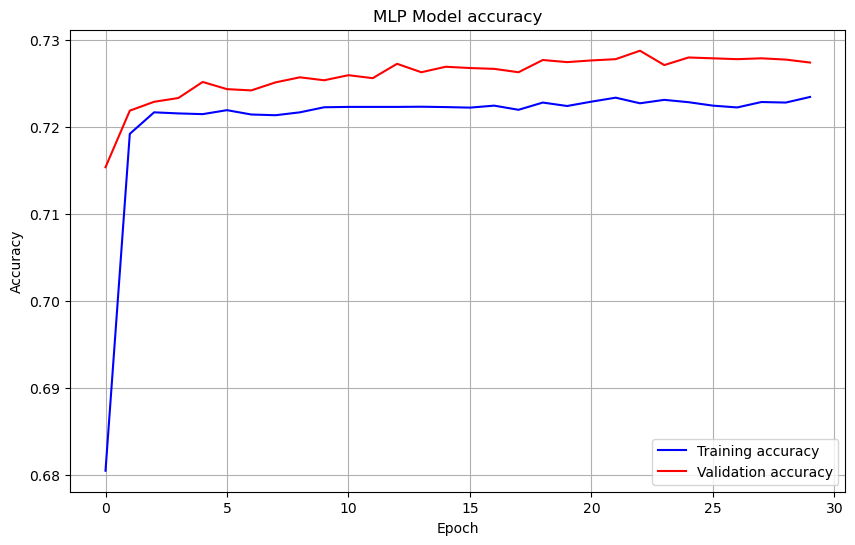

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='red')
    plt.title('MLP Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()





# Build the MLP model
model = Sequential()
model.add(Dense(units=3, activation='relu', input_dim=6))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and collect the training history
history = model.fit(X3_train, Y3_train, epochs=30, batch_size=32, validation_data=(X3_test, Y3_test), verbose=0)


# Plot learning curves
plot_learning_curves(history)

### Comparison of Models and Summary

**Summary of Performance Evaluation Metrics**:

- MLP Model:

   - Accuracy: 72.63%
   - Learning curves show good convergence and generalization performance
   - Cross-validation results:
     5-fold: Mean CV score of 72.15%, standard deviation of 0.38%
     10-fold: Mean CV score of 72.11%, standard deviation of 0.60%



- Random Forest Model:

  - Accuracy: 72.38%
  - Cross-validation results:
    5-fold: Mean CV score of 72.23%, standard deviation of 0.15%
    10-fold: Mean CV score of 72.26%, standard deviation of 0.29%



- Logistic Regression Model:

  - Accuracy: 72.64%
  - Learning curves show good convergence and generalization performance
  - Cross-validation results:
    5-fold: Mean CV score of 72.04%, standard deviation of 0.16%
    10-fold: Mean CV score of 72.04%, standard deviation of 0.33%
  


- **Observations**:
    
    -  The differences in performance for accuracy and cross-validation among the three models are marginal. All three models (logistic regression, random forest, MLP) showed similar performance, with accuracies around 72-73%
    <br>
    
    -  The MLP model and the logistic regression model exhibit
       the most similar and best performance, although the Random Forest Classifier also yielded competitive performance.  
    <br>
    -  Both  the MLP model and Logistic Regression show good convergence and generalization performance based on their 
       learning curves.
        - The MLP model has better generalization performance compared to the logistic regression model due to slightly higher mean CV scores. However, the logistic regression model has a marginally higher accuracy and lower standard deviations in cross-validation scores, suggesting more stable performance. <br>
        <br>
    
    - Considering the learning curves, the MLP model showcases the best fit and convergence, indicating the best generalization     capability. The Logistic Regression model, on the other hand, exhibits the most stable performance across different cross-    validation folds.

- **Insights**:
- MLP and LR models are recommended for their performance stability (LR), interpretability (LR),prediction performance, generalization (MLP), accuracy (MLP):
    - The interpretability of the logistic regression model allows medical professionals to understand the factors contributing to the predictions, which is crucial for decision-making and patient communication.
    - The ability to capture complex relationships among the input features and improved accuracy in predicting heart disease allows employment of the MLP model to have the highest possible predictive performance. <br>
<br>
-  Future work can explore advanced feature selection and ensemble modeling techniques:
    -  Use of techniques such as log transformation for variables that are not normally distributed.
    - Train multiple MLP/LR models with different architectures, hyperparameters, or training data subsets and combine their predictions using ensemble methods like averaging or voting.
    - Use MLP as a primary predictive model while using LR solely for interpretability purposes.<br>
<br>

- Limitations of the case study include the need for consideration of additional risk factors, and temporal validity in the dataset.
    - Collection of data for other heart disease markers such as chest pain and other cardio-related measurements.
    - May not account for shifts in clinical practice, demographic changes, new treatments etc. over time. Constant regular monitoring and review of production pipelines and models necessary

